----
# Laboratorium 6 - Układy stabilne i minimalnofazowe
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów Wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej 

----
## 0. Zagadnienia do opanowania przed zajęciami
----

* badanie stabilności układu (stabilność w sensie BIBO) 
* analiza układów zamkniętych pętlą sprzężenia zwrotnego
* analiza układów minimalnofazowych
* zera i bieguny transmitancji  

Funkcje z biblioteki *scipy.signal* potrzebne do zrealizowania ćwiczenia:  
`scipy.signal.freqresp`, `scipy.signal.signal.tf2ss`,  `scipy.signal.impulse`

Dokumentacja i opisy poszczególnych funkcji *scipy.signal*:  
https://docs.scipy.org/doc/scipy/reference/signal.html    



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import sympy
poles_figsize  =(8, 8)
default_figsize=(14, 8)

---- 
## 1. Pojęcie stabilności
---- 
* Co to znaczy że układ jest stabilny?
* Jakie są kryteria stabilności?
* Jak sprawdzić czy układ jest stabilny?

---- 
## 2. Zbadaj stabilność w sensie BIBO
---- 
| | |
|------------------------------------------|------------------------------------|
|$$H(s) = {{s^2-2s+3} \over {s^2+2s+ 1}}$$  |  $$H(s) = {{s^2+1}\over{s^2+3s+1}}$$|
|$$ H(s) = {{1} \over {s^2 + 2}} $$  |$$ H(s) = {{1} \over {s^2 +8s+15}} $$|
|$$ H(s) = {{s^2-2s+3} \over {s^2 + 2}} $$  |$$ H(s) = {{1} \over {s^2 +6s-7}} $$|
|$$ H(s) = {{s + 2} \over {s + 1}} $$  |$$ H(s) = {{1} \over {s+1}} $$|
|$$ H(s) = {{s - 1} \over {s + 1}} $$|$$ H(s) = {{1} \over {s-1}} $$|
|$$ H(s) = {{2s+3} \over {s^2 + 4s + 4}} $$|$$ H(s) = {{s+1} \over {s+ 2}} $$|
|$$ H(s) = {{s^4+2s^3+2s^2+2} \over {s^3-2s^2 + 4s + 1}} $$|$$ H(s) = {{s-1} \over {s+ 2}} $$|
W tym celu zdefiniuj wektor złożony ze współczynników przy każdej zmiennej s do stopnia danego wielomianu. Wykorzystaj funkcję np.poly1d oraz np.roots. Uwaga, jeśli dla układu definiujemy transmitancję jako współczynniki licznika i mianownika (num, den), to współczynniki powinny być podane w kolejności malejącego wykładnika (np. s^2 + 3s + 5 byłyby reprezentowane jako [1, 3, 5]). W miejsce R i C podstaw wartości jednostkowe. Przedstaw położenie biegunów na płąszczyźnie zespolonej krzyżykami. 


Bieguny transmitancji H1(s):  [-0.99999999 -1.00000001]
Transmitancja H1(s) jest nie stabilna
Bieguny transmitancji H2(s):  [-0.+1.41421356j  0.-1.41421356j]
Transmitancja H2(s) jest nie stabilna
Bieguny transmitancji H3(s):  [-0.+1.41421356j  0.-1.41421356j]
Transmitancja H3(s) jest nie stabilna
Bieguny transmitancji H4(s):  [-1.]
Transmitancja H4(s) jest nie stabilna
Bieguny transmitancji H5(s):  [-1.]
Transmitancja H5(s) jest nie stabilna
Bieguny transmitancji H6(s):  [-1.99999999 -2.00000001]
Transmitancja H6(s) jest nie stabilna
Bieguny transmitancji H7(s):  [ 1.11124726+1.80544243j  1.11124726-1.80544243j -0.22249451+0.j        ]
Transmitancja H7(s) jest nie stabilna


/var/folders/rg/560t48155lg6wpf9k6hlnwcc0000gn/T/ipykernel_88494/2279184361.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


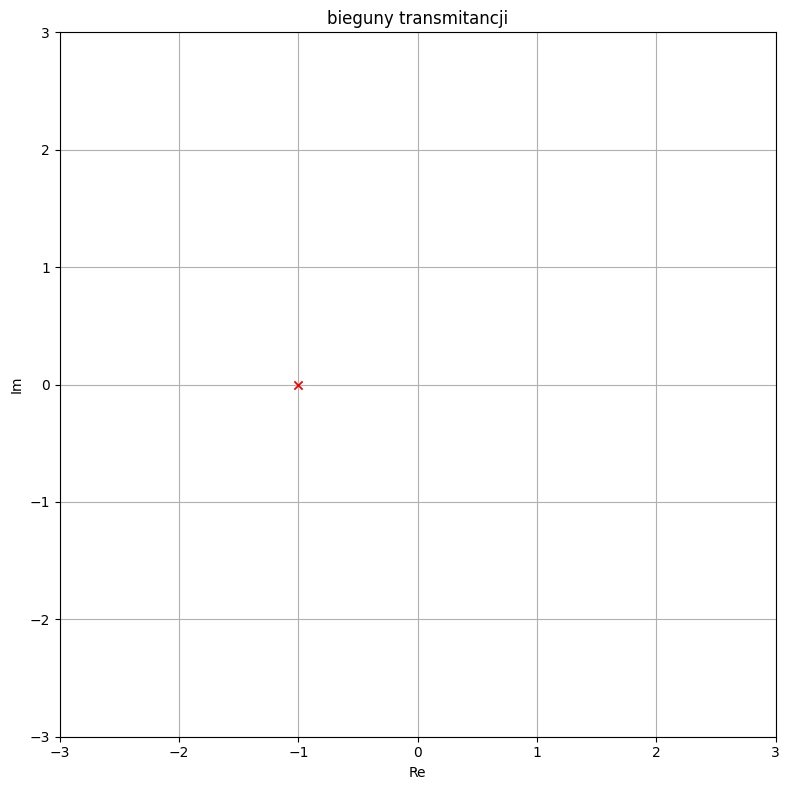

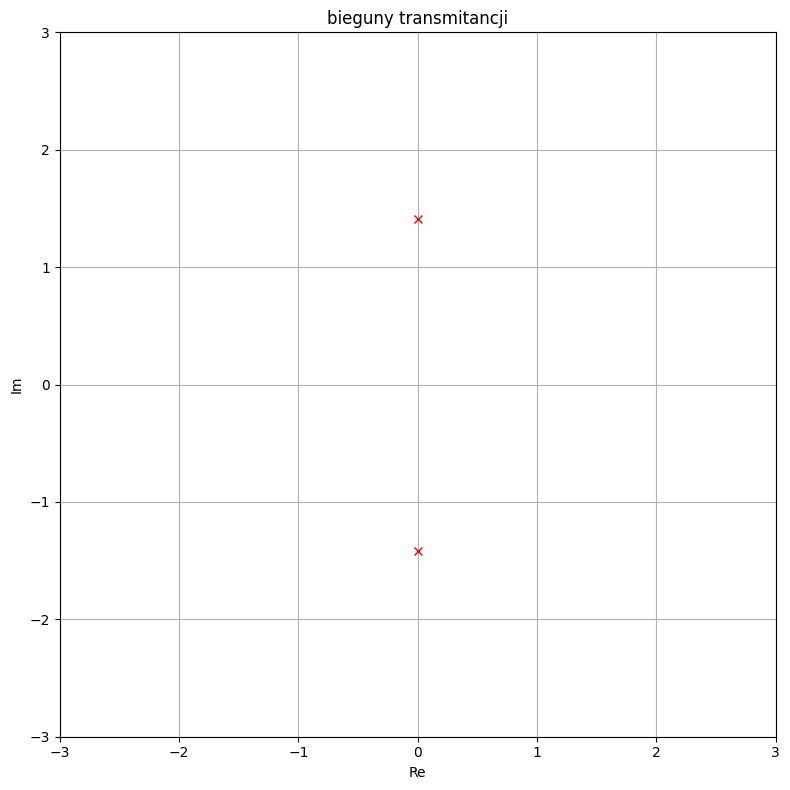

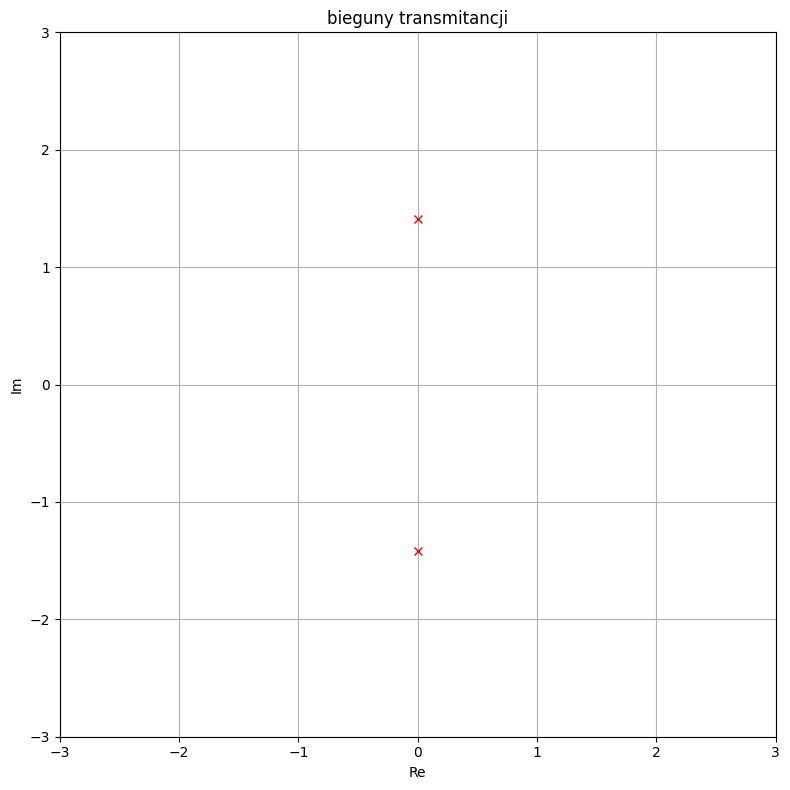

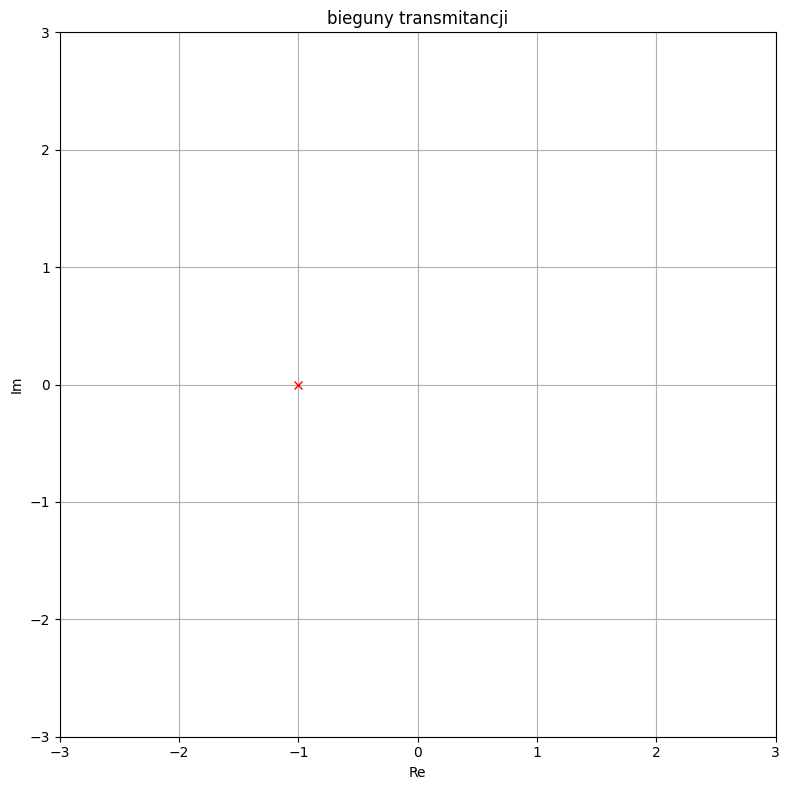

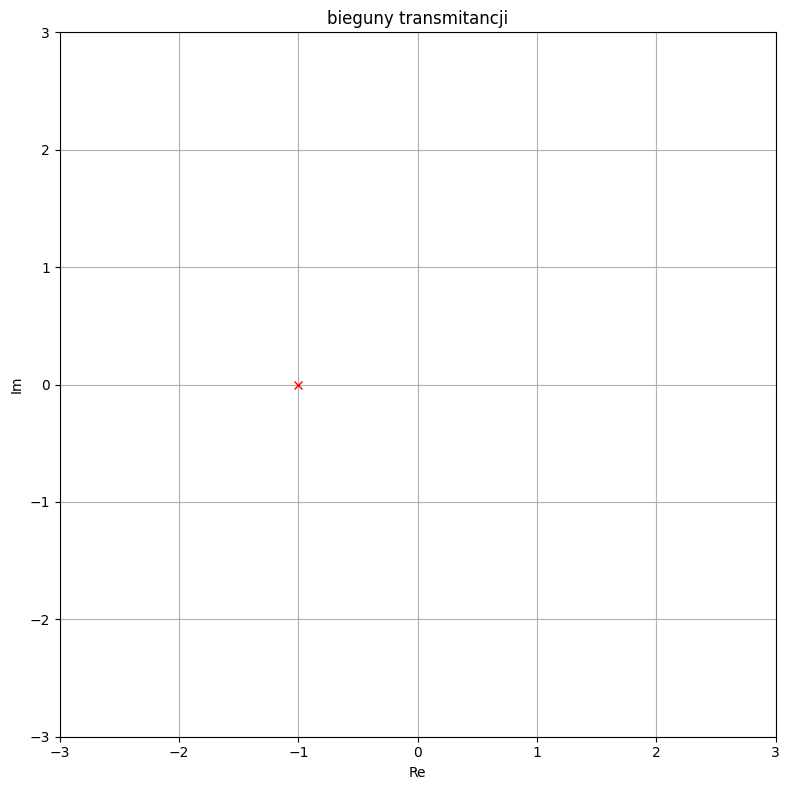

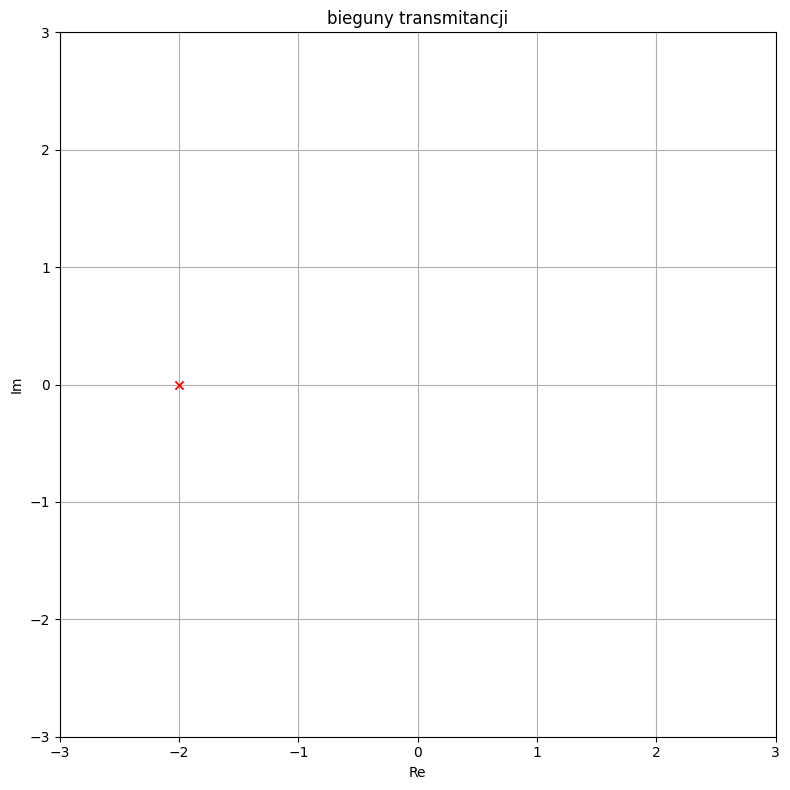

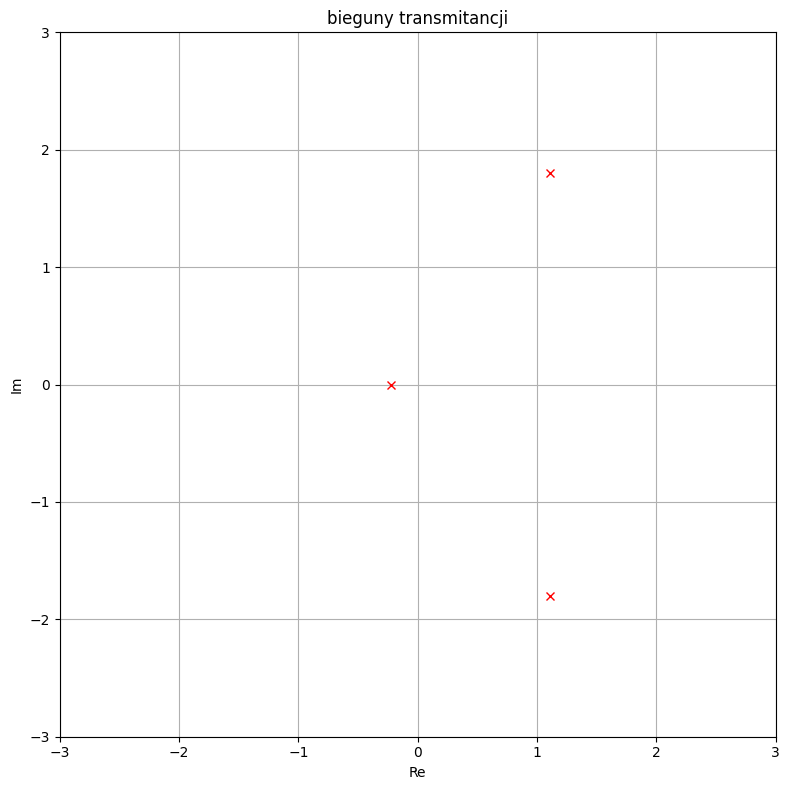

In [25]:
#define list of denominators
denominators = [[1, 2, 1],
                [1, 0, 2],
                [1, 0, 2],
                [0, 1, 1],
                [0, 1, 1],
                [1, 4, 4],
                [1, -2, 4, 1]]

s = sympy.Symbol('s', real = 'False', nonzero = 'True')
#R = sympy.Symbol('R', real = 'True' , nonzero = 'True')
#C = sympy.Symbol('C', real = 'True' , nonzero = 'True')

#for each denominator from list - calculate roots
i = 0
for denominator in denominators:
    i += 1
    Hs = np.poly1d(denominator)
    roots = np.roots(Hs)
    print(f"Bieguny transmitancji H{i}(s): ", str(roots))
    if (roots.any() < 0):
        print(f"Transmitancja H{i}(s) jest stabilna")
    else:
        print(f"Transmitancja H{i}(s) jest nie stabilna")
    fig, ax = plt.subplots(1, 1, figsize=poles_figsize)
    ax.plot(roots.real, roots.imag,'rx')
    ax.set_title("bieguny transmitancji")
    ax.set_xlabel("Re")
    ax.set_ylabel("Im")
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.grid()
    fig.tight_layout()
    fig.show()


----
## 3. Sprawdź właściwości systemów
-----------------
* na 1. wykresie umieść charakterystyki amplitudowe wszystkich układów
* na 2. wykresie umieść charakterystyki fazowe wszystkich układów
* na 3. wykresie zaznacz połóożenie zer biegonów dla wszystkich układów

Transmitancje układów:
$$H_1(s) = {{s^2+6s+8} \over {s^2+2s+ 3}}$$
$$H_2(s) = {{s^2-2s-8} \over {s^2+2s+ 3}}$$
$$H_3(s) = {{s^2-6s+8} \over {s^2+2s+ 3}}$$
$$H_4(s) = {{s^2+2s-8} \over {s^2+2s+ 3}}$$

Wskaż układ minimalnofazowy



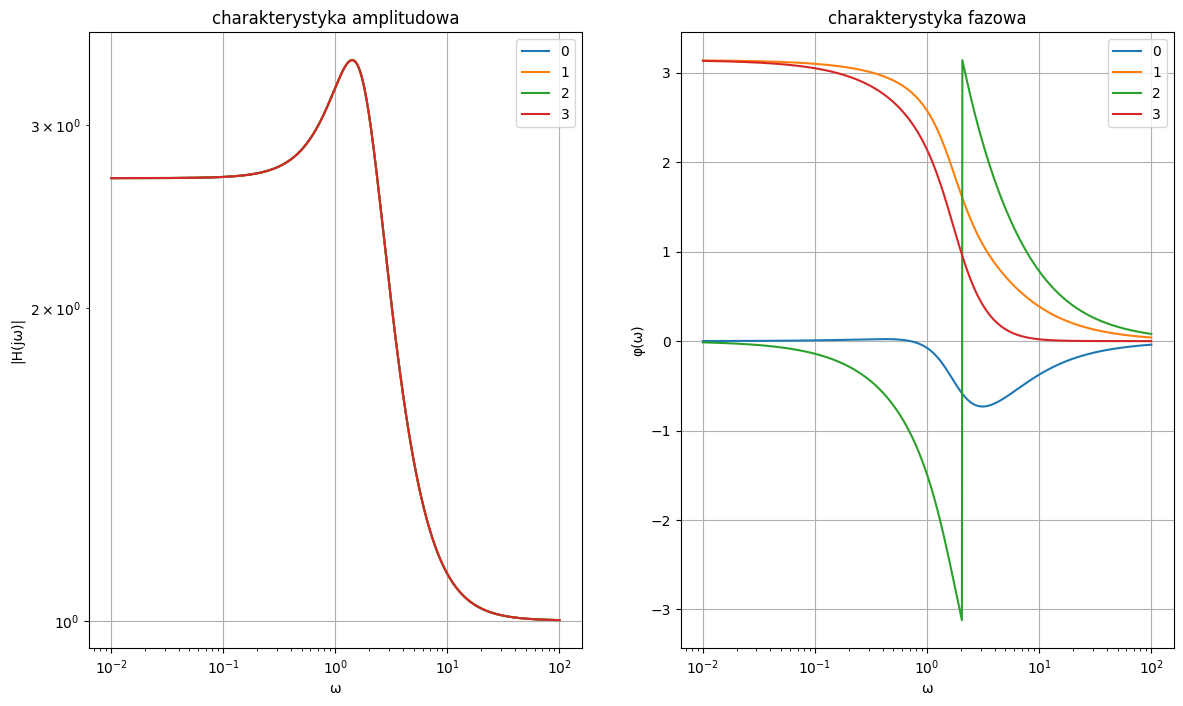

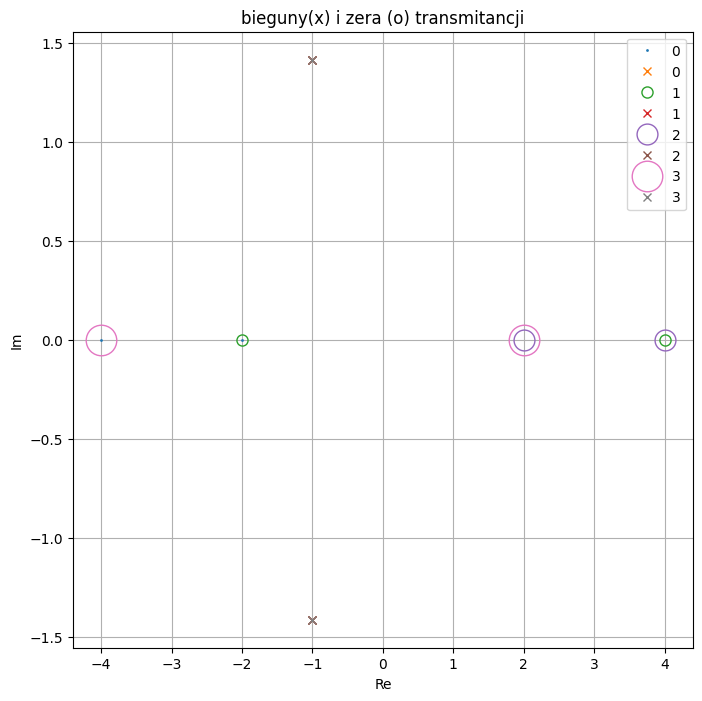

In [3]:
#define list of numerators
numerators = [[1, 6, 8],
              [1,-2,-8],
              [1,-6, 8],
              [1, 2,-8]
]
#define denominator
denominator = [1, 2, 3]
w=np.logspace(-2,2,1000)
s=w*1j


figMP, axsMP = plt.subplots(1, 2, figsize=default_figsize) #wskaźniki na dany wykres, wykres
figZP, axZP  = plt.subplots(1, 1, figsize=poles_figsize  )

for idx, licznik in enumerate(numerators):
    
    #charakterystyka amplitudowa 
    B=np.poly1d(licznik)
    A=np.poly1d(denominator)
    H=B(s)/A(s)
    M=np.abs(H)
    axsMP[0].loglog(w,M,label=str(idx))
    axsMP[0].legend()
        
    #charakterystyka fazowa
    F=np.angle(H)
    axsMP[1].semilogx(w,F,label=str(idx))
    axsMP[1].legend()
    
    #zera transmitancji
    zero=np.roots(B)
    bieguny=np.roots(A)
    axZP.plot(zero.real, zero.imag,'o',markerfacecolor='none', markersize=1+idx*7 ,label=str(idx))
    axZP.plot(bieguny.real, bieguny.imag,'x',label=str(idx))
    axZP.legend()
    

axsMP[0].set_title("charakterystyka amplitudowa")
axsMP[0].set_xlabel("ω")
axsMP[0].set_ylabel("|H(jω)|")
axsMP[0].grid() 
axsMP[1].set_title("charakterystyka fazowa")
axsMP[1].set_xlabel("ω")
axsMP[1].set_ylabel("φ(ω)")
axsMP[1].grid()
#figMP.tight_layout()
#figMP.show()

axZP.set_title("bieguny(x) i zera (o) transmitancji")
axZP.set_xlabel("Re")
axZP.set_ylabel("Im") 
axZP.grid()
#figZP.tight_layout()
#figZP.show()
#niebieski naj bd optymalny bo najmniej zmienia faze
#
#